In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('F:\Data_Science\purchased.xlsx')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
X=df.drop(['User ID','Gender','Purchased'],axis=1)

In [7]:
y=df['Purchased']

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


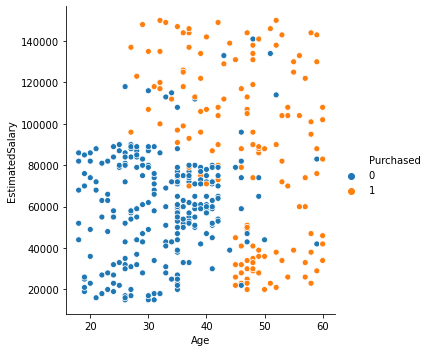

In [10]:
import seaborn as sns
sns.relplot(x='Age',y='EstimatedSalary', hue='Purchased',data=df)

In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [13]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [14]:
rf_clas=RandomForestClassifier()
rf_clas.fit(X_train,y_train)
rf_clas.score(X_test,y_test)

0.87

In [16]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=2)
cross_val_score(RandomForestClassifier(),X,y,cv=cv).mean()

0.892

In [17]:
def cross_val_score_model(model):
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=2)
    cv_score=cross_val_score(model,X,y,cv=cv).mean()
    print('CV_score' + ' '+ str(model) +': '+ str(cv_score))

cross_val_score_model(SVC())
cross_val_score_model(RandomForestClassifier())
cross_val_score_model(DecisionTreeClassifier())
cross_val_score_model(LogisticRegression(solver='liblinear',multi_class='auto'))

CV_score SVC(): 0.766
CV_score RandomForestClassifier(): 0.892
CV_score DecisionTreeClassifier(): 0.836
CV_score LogisticRegression(solver='liblinear'): 0.63


In [22]:
model_params={
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,10,100],
            'kernel':['rbf','sigmoid']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,200,600,800,1000],
            'criterion' : ['gini', 'entropy']
        }
    },
    'decisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' : ['gini', 'entropy'],
            'splitter':['best', 'random']
            }
    },
    'logistic regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
            
    }

}

In [23]:
scores=[]
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=2)
for model_name, mp in model_params.items():
    rfc=RandomizedSearchCV(mp['model'],mp['params'],cv=cv, return_train_score=False)
    rfc.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':rfc.best_score_,
        'best param':rfc.best_params_,
        'best estimator':rfc.best_estimator_
    })

ds=pd.DataFrame(scores,columns=['model','best_score','best param','best estimator'])
ds

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,best_score,best param,best estimator
0,svm,0.782,"{'kernel': 'rbf', 'C': 100}",SVC(C=100)
1,random_forest,0.900,"{'n_estimators': 100, 'criterion': 'gini'}","(DecisionTreeClassifier(max_features='auto', r..."
2,decisionTree,0.862,"{'splitter': 'random', 'criterion': 'entropy'}","DecisionTreeClassifier(criterion='entropy', sp..."
3,logistic regression,0.630,{'C': 1},"LogisticRegression(C=1, solver='liblinear')"


In [24]:
ds

,model,best_score,best param,best estimator
0,svm,0.782,"{'kernel': 'rbf', 'C': 100}",SVC(C=100)
1,random_forest,0.900,"{'n_estimators': 100, 'criterion': 'gini'}","(DecisionTreeClassifier(max_features='auto', r..."
2,decisionTree,0.862,"{'splitter': 'random', 'criterion': 'entropy'}","DecisionTreeClassifier(criterion='entropy', sp..."
3,logistic regression,0.630,{'C': 1},"LogisticRegression(C=1, solver='liblinear')"


In [26]:
def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df)

display_text_max_col_width(ds["best param"], 800)


0                       {'kernel': 'rbf', 'C': 100}
1        {'n_estimators': 100, 'criterion': 'gini'}
2    {'splitter': 'random', 'criterion': 'entropy'}
3                                          {'C': 1}
Name: best param, dtype: object


In [27]:
cross_val_score_model(SVC(kernel='rbf',C=100))
cross_val_score_model(RandomForestClassifier(n_estimators= 100,criterion='gini'))
cross_val_score_model(DecisionTreeClassifier(criterion='entropy',splitter='random'))
cross_val_score_model(LogisticRegression(solver='liblinear',multi_class='auto',C=1))

CV_score SVC(C=100): 0.782
CV_score RandomForestClassifier(): 0.8940000000000001
CV_score DecisionTreeClassifier(criterion='entropy', splitter='random'): 0.8640000000000001
CV_score LogisticRegression(C=1, solver='liblinear'): 0.63


# BEST MODEL 'RANDOM FOREST CLASSIFIER' WITH HYPER TUNING PARAMETER

In [28]:
rf_clas_best=(RandomForestClassifier(n_estimators= 100,criterion='gini'))
rf_clas_best.fit(X_train,y_train)
rf_clas_best.score(X_test,y_test)

0.87

In [33]:
df.iloc[336]

User ID            15664907
Gender                 Male
Age                      58
EstimatedSalary      144000
Purchased                 1
Name: 336, dtype: object

In [34]:
a=[[58,144000]]
a=s.transform(a)
b=rf_clas_best.predict(a)
b

array([1], dtype=int64)